In [215]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as scp

def mean(x):
    return scp.stats.trim_mean(x, 0.2)

def std(x):
    x = np.array(x)
    x.sort()
    low = int(0.2 * len(x))
    high = int(0.8 * len(x))
    
    return x[low:high].std(ddof=0)

param_dir = os.path.join("..", "out", "param")
results = []
for fname in os.listdir(param_dir):
    with open(os.path.join(param_dir, fname)) as f:
        results.append(json.load(f))
df = pd.DataFrame(data=results)
#print(df)

exp1 = df.groupby(["dataset", "num_train_data", "mix_strategy"])["test_acc"].agg([mean, std, "count"])
exp1

/home/sh0416/anaconda3/envs/python3.8/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/sh0416/anaconda3/envs/python3.8/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/sh0416/anaconda3/envs/python3.8/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


mean       std  \
dataset                num_train_data mix_strategy                           
ag_news                40             mixuptransformer  0.860000  0.000474   
                                      none              0.852401  0.002731   
                                      nonlinearmix      0.851678  0.001747   
                                      oommix            0.848918  0.001346   
                                      tmix              0.852105  0.001626   
                       500            mixuptransformer  0.885789  0.000186   
                                      none              0.882237  0.000186   
                                      nonlinearmix      0.882412  0.000541   
                                      oommix            0.884079  0.000468   
                                      tmix              0.884474  0.000186   
                       2500           mixuptransformer  0.896228  0.000895   
                                      nonlinearmix      0.887368  0.003648   
                       10000          mixuptransformer  0.913684  0.002058   
                                      nonlinearmix      0.888553  0.001220   
                       30000          oommix            0.917456  0.003355   
                                      tmix              0.920658  0.000000   
amazon_review_polarity 40             mixuptransformer  0.808242  0.019334   
                                      none              0.789839  0.005657   
                                      nonlinearmix      0.747490  0.015059   
                                      tmix              0.816059  0.006346   
                       500            mixuptransformer  0.893141  0.001351   
                                      none              0.891710  0.003452   
                                      nonlinearmix      0.890159  0.002055   
                                      oommix            0.896570  0.001197   
                                      tmix              0.895788  0.000195   
                       2500           mixuptransformer  0.907042  0.000519   
                                      nonlinearmix      0.910388  0.001132   
                       10000          mixuptransformer  0.921220  0.002842   
                                      nonlinearmix      0.911502  0.004202   
dbpedia                140            mixuptransformer  0.967807  0.001078   
                                      none              0.963696  0.002731   
                                      nonlinearmix      0.944925  0.003786   
                                      tmix              0.963290  0.000824   
                       500            mixuptransformer  0.980567  0.000521   
                                      none              0.978657  0.000686   
                                      nonlinearmix      0.975057  0.002496   
                                      oommix            0.982671  0.000435   
                                      tmix              0.981457  0.000959   
                       2800           mixuptransformer  0.987562  0.000125   
                                      nonlinearmix      0.959043  0.039652   
                       35000          mixuptransformer  0.989257  0.000369   
                                      nonlinearmix      0.977243  0.016405   
yahoo_answer           40             mixuptransformer  0.520483       NaN   
                       100            mixuptransformer  0.601800  0.006286   
                                      none              0.590396  0.001415   
                                      nonlinearmix      0.578163  0.050824   
                                      tmix              0.605644  0.003055   
                       500            mixuptransformer  0.676283  0.000636   
                                      none              0.672400  0.000722   
                                      nonlinearmix      0.663561  0.014394   
    

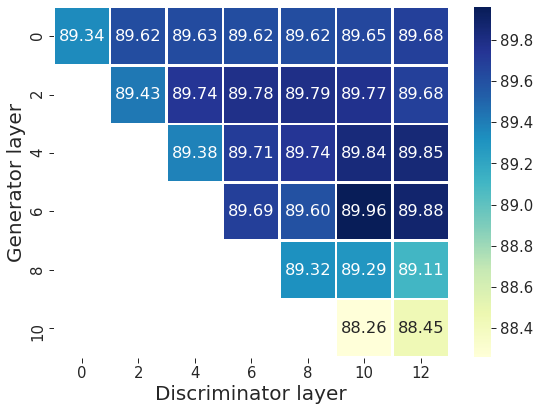

In [214]:
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(context="paper", style="ticks", font_scale=1.7)
matrix = np.zeros((6, 7))

fig, ax = plt.subplots(figsize=(8, 6))
for idx, row in df[(df["dataset"]=="amazon_review_polarity")&(df["mix_strategy"]=="oommix")].groupby(["m_layer", "d_layer"])["test_acc"].mean().iteritems():
    matrix[(idx[0]//2, idx[1]//2)] = 100*row
mask = matrix == 0

ax = sns.heatmap(matrix, mask=mask, linewidths=1.5, cmap="YlGnBu",
                 xticklabels=[0, 2, 4, 6, 8, 10, 12],
                 yticklabels=[0, 2, 4, 6, 8, 10],
                 annot=True, fmt=".2f")
ax.set_ylabel("Generator layer", fontsize=20)
ax.set_xlabel("Discriminator layer", fontsize=20)
plt.tight_layout()
plt.savefig("exp4.png", dpi=200)

In [216]:
df[(df["mix_strategy"]=="oommix")&(df["dataset"]=="yahoo_answer")&(df["num_train_data"]==500)]

,seed,data_dir,dataset,num_train_data,data_augment,max_length,restore,epoch,batch_size,lr,...,mix_strategy,m_layer,d_layer,alpha,coeff_intr,eval_every,patience,gpu,exp_id,test_acc
25,2,/data/sh0416/dataset/pdistmix/yahoo_answers_csv,yahoo_answer,500,none,256,None,5000,12,0.00002,...,oommix,3,12,0.2,0.5,200,10,3,bd9700bb-488,0.674583
130,1,/data/sh0416/dataset/pdistmix/yahoo_answers_csv,yahoo_answer,500,none,256,None,5000,12,0.00002,...,oommix,3,12,0.2,0.5,200,10,2,2ae2ae09-bf9,0.680333
147,0,/data/sh0416/dataset/pdistmix/yahoo_answers_csv,yahoo_answer,500,none,256,None,5000,12,0.00002,...,oommix,3,12,0.2,0.5,200,10,1,bb1a5466-1b7,0.680967
175,4,/data/sh0416/dataset/pdistmix/yahoo_answers_csv,yahoo_answer,500,none,256,None,5000,12,0.00002,...,oommix,3,12,0.2,0.5,200,10,1,27c2da6b-d5c,0.677267
316,3,/data/sh0416/dataset/pdistmix/yahoo_answers_csv,yahoo_answer,500,none,256,None,5000,12,0.00002,...,oommix,3,12,0.2,0.5,200,10,0,59e6c11f-193,0.683150


In [221]:
import torch
ckpt = torch.load("../out/ckpt/model_bd9700bb-488.pth", map_location=torch.device("cpu"))

In [226]:
sum(v.numel() for k, v in ckpt.items())


114014862

In [36]:
df[(df["dataset"]=="yahoo_answer")&(df["num_train_data"] == 2000)]

,seed,data_dir,dataset,num_train_data,data_augment,max_length,restore,epoch,batch_size,lr,...,mix_strategy,m_layer,d_layer,alpha,coeff_intr,eval_every,patience,gpu,exp_id,test_acc
2,2,/data/sh0416/dataset/pdistmix/yahoo_answers_csv,yahoo_answer,2000,none,256,None,1000,12,0.00002,...,nonlinearmix,3,12,0.2,0.5,200,3,0,ac672485-3e8,0.648300
3,4,/data/sh0416/dataset/pdistmix/yahoo_answers_csv,yahoo_answer,2000,none,256,None,1000,12,0.00002,...,nonlinearmix,3,12,0.2,0.5,200,3,2,213aa171-29d,0.692850
18,0,/data/sh0416/dataset/pdistmix/yahoo_answers_csv,yahoo_answer,2000,none,256,None,1000,12,0.00002,...,nonlinearmix,3,12,0.2,0.5,200,3,2,b24e3ffd-ac3,0.690817
21,1,/data/sh0416/dataset/pdistmix/yahoo_answers_csv,yahoo_answer,2000,none,256,None,1000,12,0.00002,...,nonlinearmix,3,12,0.2,0.5,200,3,3,66bd86f3-5b0,0.691333
25,3,/data/sh0416/dataset/pdistmix/yahoo_answers_csv,yahoo_answer,2000,none,256,None,1000,12,0.00002,...,nonlinearmix,3,12,0.2,0.5,200,3,1,40dded59-1dc,0.520833


In [43]:
df[(df["dataset"]=="dbpedia")&(df["num_train_data"] == 35000)]

,seed,data_dir,dataset,num_train_data,data_augment,max_length,restore,epoch,batch_size,lr,...,mix_strategy,m_layer,d_layer,alpha,coeff_intr,eval_every,patience,gpu,exp_id,test_acc
4,1,/data/sh0416/dataset/pdistmix/dbpedia_csv,dbpedia,35000,none,256,None,1000,12,0.00002,...,nonlinearmix,3,12,0.2,0.5,200,3,0,09791bea-a74,0.988757
12,4,/data/sh0416/dataset/pdistmix/dbpedia_csv,dbpedia,35000,none,256,None,1000,12,0.00002,...,nonlinearmix,3,12,0.2,0.5,200,3,3,d6679b70-7f2,0.989057
26,3,/data/sh0416/dataset/pdistmix/dbpedia_csv,dbpedia,35000,none,256,None,1000,12,0.00002,...,nonlinearmix,3,12,0.2,0.5,200,3,2,0124ad6c-782,0.913057
29,0,/data/sh0416/dataset/pdistmix/dbpedia_csv,dbpedia,35000,none,256,None,1000,12,0.00002,...,nonlinearmix,3,12,0.2,0.5,200,3,3,5713f9ba-11c,0.988929
37,2,/data/sh0416/dataset/pdistmix/dbpedia_csv,dbpedia,35000,none,256,None,1000,12,0.00002,...,nonlinearmix,3,12,0.2,0.5,200,3,1,38e9dc8b-239,0.954043
